K-means Algorithm - Iris data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
pca = PCA(2)
iris_pca = pca.fit_transform(iris_std)

1. 군집화 (clustering)

In [4]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [7]:
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')
kmeans.fit(iris_std)            # 비지도 학습이므로 y값을 제공하지 않음

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [30]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
# 학습 결과 넘버링은 집단이 큰 순서로 부여
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([52, 50, 48], dtype=int64))

2. 시각화

In [23]:
df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-2.203833,0.009216,0,1
50,1.101781,0.862972,1,2
51,0.731337,0.594615,1,2
52,1.240979,0.616298,1,2
53,0.407483,-1.754404,1,0


In [24]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         38
       2         12
2      0         14
       2         36

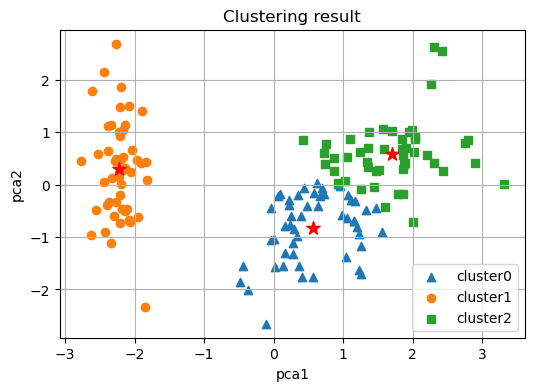

In [38]:
markers = ['^', 'o', 's']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
plt.grid(), plt.legend()
plt.title("Clustering result")
plt.xlabel('pca1'), plt.ylabel('pca2');

- PCA Original Data와 비교

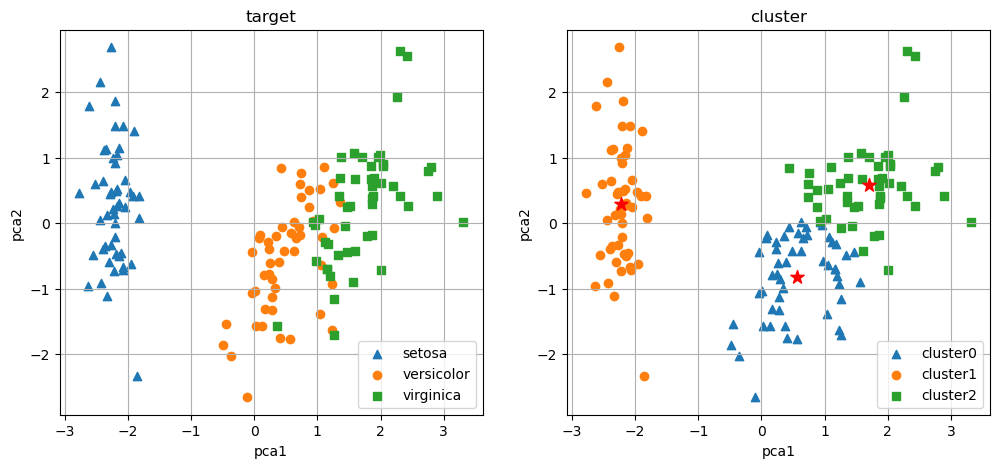

In [40]:
plt.figure(figsize=(12,5))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    markers = ['^', 'o', 's']
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label=column+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
    plt.grid(), plt.legend()
    plt.title(f"{column}")
    plt.xlabel('pca1'), plt.ylabel('pca2');